<a href="https://colab.research.google.com/github/Rafaelgeomo/Imers-o-Python/blob/main/Imers%C3%A3o_Python_Aula_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from prophet import Prophet

In [3]:
# Baixar dados dos últimos quatros anos para uma ação específica
dados = yf.download('JNJ', start='2020-01-01', end='2023-12-31', progress=False)
dados = dados.reset_index()
dados

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,145.869995,146.020004,145.080002,145.970001,130.099121,5777000
1,2020-01-03,143.500000,145.369995,143.000000,144.279999,128.592834,5752400
2,2020-01-06,144.000000,144.199997,142.850006,144.100006,128.432449,7731300
3,2020-01-07,144.009995,145.449997,141.380005,144.979996,129.216751,7382900
4,2020-01-08,144.869995,145.979996,143.699997,144.960007,129.198929,6605800
...,...,...,...,...,...,...,...
1001,2023-12-22,155.250000,156.529999,155.020004,155.460007,154.288544,3798500
1002,2023-12-26,155.000000,156.350006,154.850006,156.139999,154.963409,4170000
1003,2023-12-27,155.500000,156.520004,155.419998,156.350006,155.171844,5288100
1004,2023-12-28,156.000000,157.240005,155.990005,156.580002,155.400101,4377500


In [5]:
# Vamos dividir os dados em treino (até o final do primeiro semestre de 2023) e teste (segundo semestre de 2023)
dados_treino = dados[dados['Date'] < '2023-07-31']
dados_teste = dados[dados['Date'] >= '2023-07-31']

In [8]:
# Preparando os dados para o FBProphet
dados_prophet_treino = dados_treino[['Date', 'Close']].rename(columns={'Date' : 'ds', 'Close' : 'y'})
dados_prophet_treino

,ds,y
0,2020-01-02,145.970001
1,2020-01-03,144.279999
2,2020-01-06,144.100006
3,2020-01-07,144.979996
4,2020-01-08,144.960007
...,...,...
894,2023-07-24,171.080002
895,2023-07-25,172.389999
896,2023-07-26,172.720001
897,2023-07-27,173.690002


In [9]:
# Criar e treinar o modelo
modelo = Prophet(weekly_seasonality=True, # semanal
                 yearly_seasonality=True, # anual
                 daily_seasonality=False) # diario

modelo.add_country_holidays(country_name='US') # adicionando os feriados e entre parentes a sigla do pais

modelo.fit(dados_prophet_treino)


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4fl7vixw/4hvxfcwj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4fl7vixw/z8_u8ntc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17217', 'data', 'file=/tmp/tmp4fl7vixw/4hvxfcwj.json', 'init=/tmp/tmp4fl7vixw/z8_u8ntc.json', 'output', 'file=/tmp/tmp4fl7vixw/prophet_modelcka_d_er/prophet_model-20240330193220.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:32:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:32:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [10]:
# Criar datas futuras para previsão até o final de 2023
futuro = modelo.make_future_dataframe(periods=150)
previsao = modelo.predict(futuro)

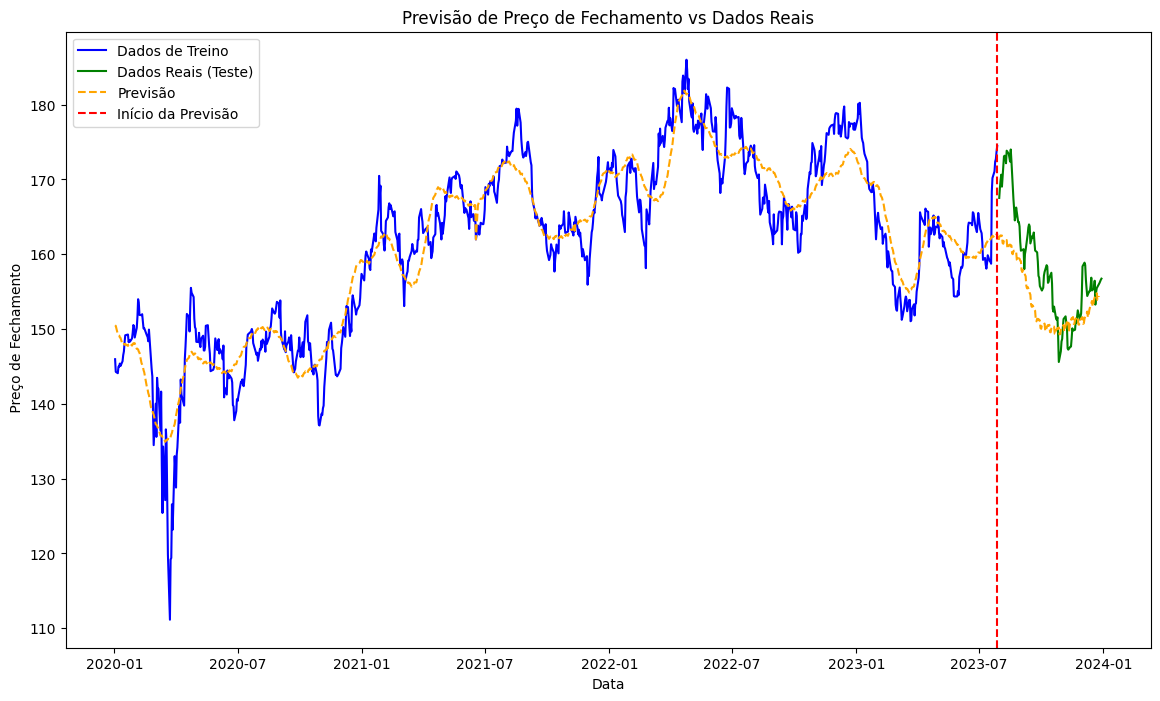

In [12]:
# Plotar os dados de treino, teste e previsões
plt.figure(figsize= (14,8))
plt.plot(dados_treino['Date'], dados_treino['Close'], label='Dados de Treino', color='blue')
plt.plot(dados_teste['Date'], dados_teste['Close'], label='Dados Reais (Teste)', color='green')
plt.plot(previsao['ds'], previsao['yhat'], label='Previsão', color='orange', linestyle='--')

plt.axvline(dados_treino['Date'].max(), color='red', linestyle='--', label='Início da Previsão')
plt.xlabel('Data')
plt.ylabel(' Preço de Fechamento')
plt.title('Previsão de Preço de Fechamento vs Dados Reais')
plt.legend()
plt.show()